In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Styling
plt.style.use('tdrstyle.mplstyle')

In [2]:
old_file = '../test7/histos_tba.16.npz'
with np.load(old_file) as loaded:
  old_variables = loaded['variables']
  old_parameters = loaded['parameters']

In [3]:
new_file = '../test7/histos_tba.17.npz'
with np.load(new_file) as loaded:
  new_variables = loaded['variables']
  new_parameters = loaded['parameters']

In [4]:
nlayers = 12

In [5]:
old_x_bend = old_variables[:, nlayers*2:nlayers*3]
old_x_ring = old_variables[:, nlayers*4:nlayers*5].astype(np.int32)
old_x_fr   = old_variables[:, nlayers*5:nlayers*6].astype(np.int32)
old_x_mask = old_variables[:, nlayers*6:nlayers*7].astype(np.bool)
old_y_pt   = old_parameters[:, 0]
new_x_bend = new_variables[:, nlayers*2:nlayers*3] * -1  # same direction as q/pt
new_x_ring = new_variables[:, nlayers*4:nlayers*5].astype(np.int32)
new_x_fr   = new_variables[:, nlayers*5:nlayers*6].astype(np.int32)
new_x_mask = new_variables[:, nlayers*6:nlayers*7].astype(np.bool)
new_y_pt   = new_parameters[:, 0]

old 0 -5.5379276 5.5379276


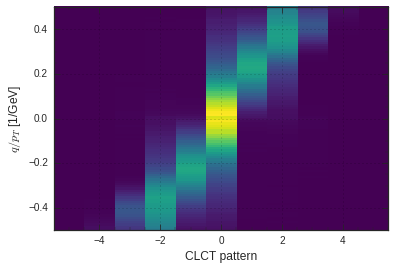

new 0 -177.21368 132.91028
0.0 [0.01426391]
0.0 [0.01426391]


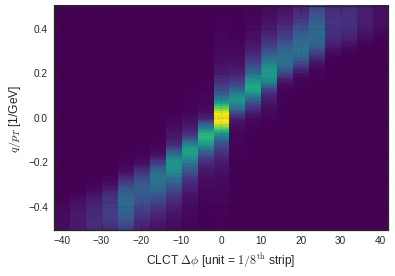

old 1 -4.0 4.0


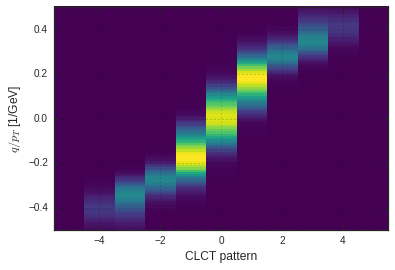

new 1 -70.0 84.0
0.0 [0.01087034]
0.0 [0.01087045]


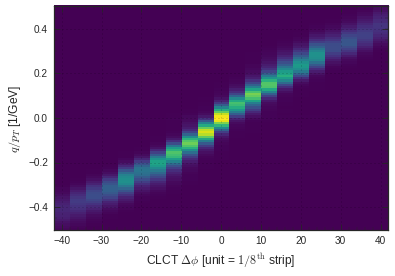

old 2 -4.0 4.0


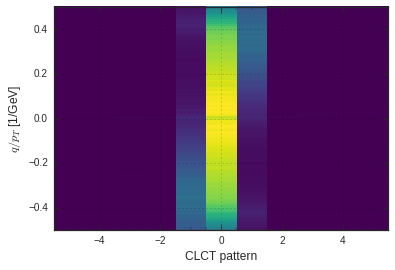

new 2 -72.0 84.0
0.0 [0.02237085]
0.0 [0.02239498]


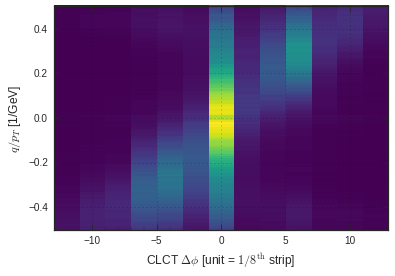

old 2 -4.0 4.0


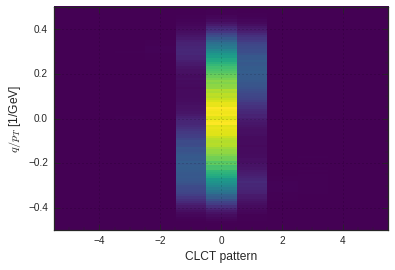

new 2 -63.0 82.0
0.0 [0.01072619]
0.0 [0.01072804]


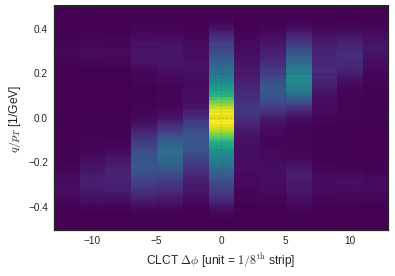

old 3 -4.0 4.0


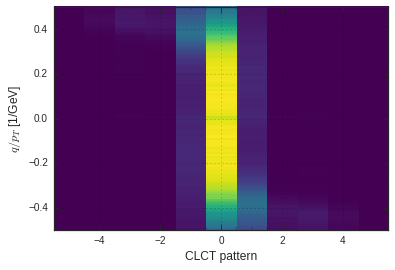

new 3 -70.0 72.0
0.0 [-0.01358612]
0.0 [-0.01359681]


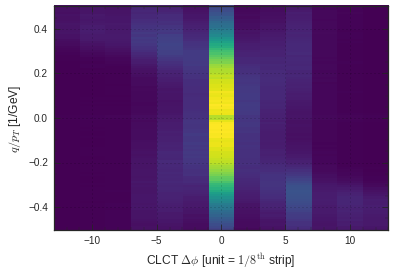

old 3 -4.0 4.0


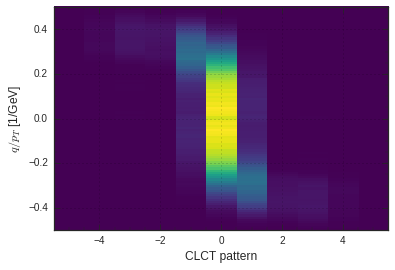

new 3 -84.0 70.0
0.0 [-0.01348187]
0.0 [-0.01348698]


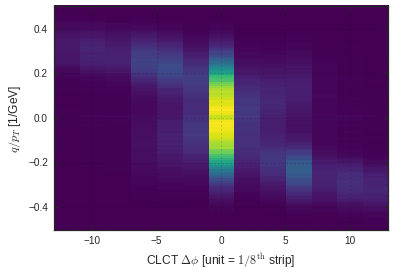

old 4 -4.0 4.0


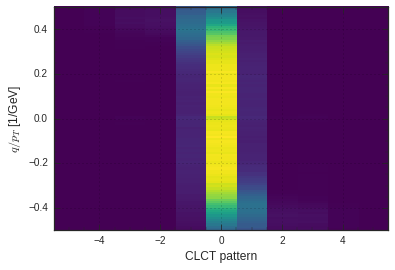

new 4 -84.0 77.0
0.0 [-0.01604502]
0.0 [-0.01606188]


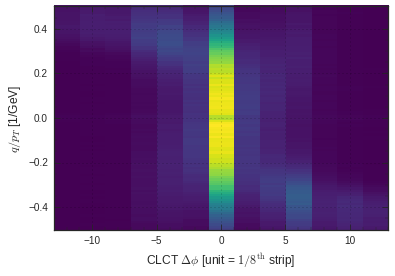

old 4 -4.0 4.0


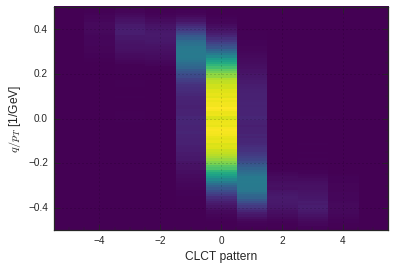

new 4 -84.0 89.0
0.0 [-0.01383256]
0.0 [-0.01383653]


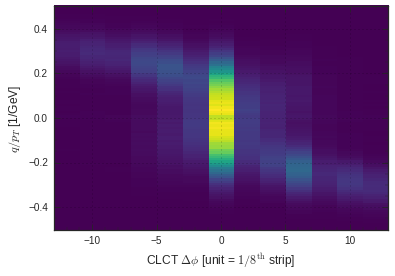

In [6]:
from sklearn.linear_model import LinearRegression, Ridge

for lay in [0,1,2,3,4]:
  for ring in [1,2]:
    for is_new, x_bend, x_ring, x_mask, y_pt in zip(['old', 'new'], [old_x_bend, new_x_bend], [old_x_ring, new_x_ring], [old_x_mask, new_x_mask], [old_y_pt, new_y_pt]):
      plt.figure()

      mask = x_mask[...,lay]
      if ring == 1:
        valid = ~mask & ((x_ring[...,lay] == 1) | (x_ring[...,lay] == 4)) 
        #valid = ~mask & (x_ring[...,lay] == 1)
        #valid = ~mask & (x_ring[...,lay] == 1)
      else:
        valid = ~mask & ((x_ring[...,lay] == 2) | (x_ring[...,lay] == 3))
      
      x_i = x_bend[valid,lay]
      y_i = y_pt[valid]
      
      if x_i.size == 0: continue
      
      if lay == 0 and ring == 1:
        x_i = np.where(x_ring[valid,lay] == 4, x_i * 0.026331/0.014264, x_i)
      
      print is_new, lay, np.min(x_i), np.max(x_i)
      
      if is_new == 'new':
        lin = LinearRegression(fit_intercept=False).fit(x_i[:,np.newaxis], y_i)
        print lin.intercept_, lin.coef_
        rid = Ridge(fit_intercept=False, alpha=0.1).fit(x_i[:,np.newaxis], y_i)
        print rid.intercept_, rid.coef_
        
      if is_new == 'old':
        xmin, xmax = -5.5, 5.5
        ymin, ymax = -0.5, 0.5
        xbins = 11
        ybins = 100
        plt.hist2d(x_i, y_i, bins=[xbins,ybins], range=[[xmin, xmax], [ymin, ymax]], cmap=plt.cm.viridis)
        plt.xlabel(r'CLCT pattern')
      else:
        if lay in (0,1):
          xmin, xmax = -42, 42
          ymin, ymax = -0.5, 0.5
          xbins = 21
          ybins = 100
        else:
          xmin, xmax = -13, 13
          ymin, ymax = -0.5, 0.5
          xbins = 13
          ybins = 100
        plt.hist2d(x_i, y_i, bins=[xbins,ybins], range=[[xmin, xmax], [ymin, ymax]], cmap=plt.cm.viridis)
        plt.xlabel(r'CLCT $\Delta\phi$ [unit = $1/8^\mathrm{th}$ strip]')
      plt.ylabel(r'$q/p_{T}$ [1/GeV]')
      plt.show()

old 0 -3.0 3.0


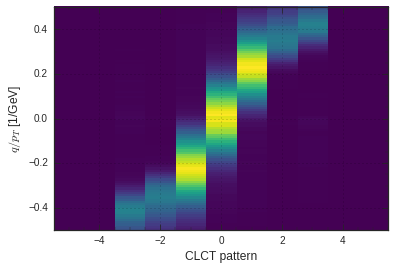

new 0 -82.0 74.0
0.0 [0.01426387]
0.0 [0.01426421]


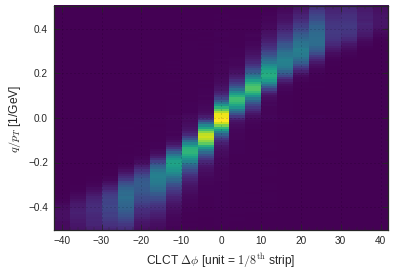

old 0 -3.0 3.0


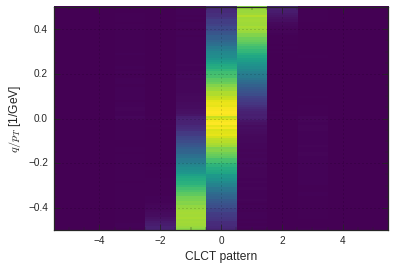

new 0 -96.0 72.0
0.0 [0.026331]
0.0 [0.0263319]


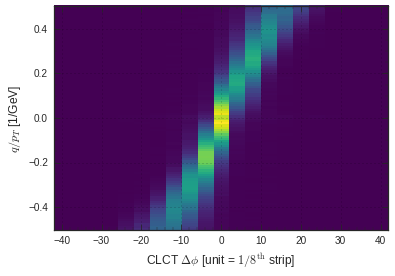

In [7]:
from sklearn.linear_model import LinearRegression, Ridge

for lay in [0]:
  for ring in [1,4]:
    for is_new, x_bend, x_ring, x_mask, y_pt in zip(['old', 'new'], [old_x_bend, new_x_bend], [old_x_ring, new_x_ring], [old_x_mask, new_x_mask], [old_y_pt, new_y_pt]):
      plt.figure()

      mask = x_mask[...,lay]
      valid = ~mask & (x_ring[...,lay] == ring)
      
      x_i = x_bend[valid,lay]
      y_i = y_pt[valid]
      
      if x_i.size == 0: continue
      
      #if lay == 0 and ring == 1:
      #  x_i = np.where(x_ring[valid,lay] == 4, x_i * 0.026331/0.014264, x_i)
      
      print is_new, lay, np.min(x_i), np.max(x_i)
      
      if is_new == 'new':
        lin = LinearRegression(fit_intercept=False).fit(x_i[:,np.newaxis], y_i)
        print lin.intercept_, lin.coef_
        rid = Ridge(fit_intercept=False, alpha=0.1).fit(x_i[:,np.newaxis], y_i)
        print rid.intercept_, rid.coef_
        
      if is_new == 'old':
        xmin, xmax = -5.5, 5.5
        ymin, ymax = -0.5, 0.5
        xbins = 11
        ybins = 100
        plt.hist2d(x_i, y_i, bins=[xbins,ybins], range=[[xmin, xmax], [ymin, ymax]], cmap=plt.cm.viridis)
        plt.xlabel(r'CLCT pattern')
      else:
        if lay in (0,1):
          xmin, xmax = -42, 42
          ymin, ymax = -0.5, 0.5
          xbins = 21
          ybins = 100
        else:
          xmin, xmax = -13, 13
          ymin, ymax = -0.5, 0.5
          xbins = 13
          ybins = 100
        plt.hist2d(x_i, y_i, bins=[xbins,ybins], range=[[xmin, xmax], [ymin, ymax]], cmap=plt.cm.viridis)
        plt.xlabel(r'CLCT $\Delta\phi$ [unit = $1/8^\mathrm{th}$ strip]')
      plt.ylabel(r'$q/p_{T}$ [1/GeV]')
      plt.show()